In [1]:
import pymongo
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['covid-19']
collection = db['covid-19']

In [3]:
df = pd.DataFrame(list(collection.find()))
df.head()

,_id,Data As Of,Start Date,End Date,Group,Year,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote,Month
0,644a2424549af5e0ac63f719,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0,NaN,NaN
1,644a2424549af5e0ac63f71a,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0,NaN,NaN
2,644a2424549af5e0ac63f71b,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0,NaN,NaN
3,644a2424549af5e0ac63f71c,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0,NaN,NaN
4,644a2424549af5e0ac63f71d,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0,NaN,NaN


In [4]:
df.describe()

,MMWR Week,COVID-19 Deaths,Total Deaths,Month
count,137016.000000,134653.000000,1.154710e+05,31680.000000
mean,24.988439,66.397711,7.681496e+02,6.100000
std,15.389035,1332.522230,1.447581e+04,3.505765
min,1.000000,0.000000,0.000000e+00,1.000000
25%,11.000000,0.000000,0.000000e+00,3.000000
50%,24.000000,0.000000,2.600000e+01,6.000000
75%,38.000000,0.000000,1.520000e+02,9.000000
max,53.000000,238853.000000,2.597547e+06,12.000000


In [5]:
df_weekly = df [df['Group']=='By Week']

In [6]:
df1 = df_weekly

In [7]:
df1

,_id,Data As Of,Start Date,End Date,Group,Year,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote,Month
0,644a2424549af5e0ac63f719,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0,NaN,NaN
1,644a2424549af5e0ac63f71a,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0,NaN,NaN
2,644a2424549af5e0ac63f71b,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0,NaN,NaN
3,644a2424549af5e0ac63f71c,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0,NaN,NaN
4,644a2424549af5e0ac63f71d,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137011,644a242d549af5e0ac660e4c,04/26/2023,04/16/2023,04/22/2023,By Week,2023,16.0,04/22/2023,10,Unknown,40-49 years,0.0,0.0,NaN,NaN
137012,644a242d549af5e0ac660e4d,04/26/2023,04/16/2023,04/22/2023,By Week,2023,16.0,04/22/2023,10,Unknown,50-64 years,0.0,NaN,One or more data cells have counts between 1-9...,NaN
137013,644a242d549af5e0ac660e4e,04/26/2023,04/16/2023,04/22/2023,By Week,2023,16.0,04/22/2023,10,Unknown,65-74 years,0.0,0.0,NaN,NaN
137014,644a242d549af5e0ac660e4f,04/26/2023,04/16/2023,04/22/2023,By Week,2023,16.0,04/22/2023,10,Unknown,75-84 years,0.0,0.0,NaN,NaN


In [8]:
#dropping data of united staes
df1 = df_weekly [df_weekly['HHS Region']!='United States']


In [9]:
df1

,_id,Data As Of,Start Date,End Date,Group,Year,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote,Month
12456,644a2426549af5e0ac6427c1,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,1,Hispanic,0-4 years,0.0,NaN,One or more data cells have counts between 1-9...,NaN
12457,644a2426549af5e0ac6427c2,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,1,Hispanic,5-17 years,0.0,0.0,NaN,NaN
12458,644a2426549af5e0ac6427c3,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,1,Hispanic,18-29 years,0.0,NaN,One or more data cells have counts between 1-9...,NaN
12459,644a2426549af5e0ac6427c4,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,1,Hispanic,30-39 years,0.0,14.0,NaN,NaN
12460,644a2426549af5e0ac6427c5,04/26/2023,12/29/2019,01/04/2020,By Week,2019/2020,1.0,01/04/2020,1,Hispanic,40-49 years,0.0,11.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137011,644a242d549af5e0ac660e4c,04/26/2023,04/16/2023,04/22/2023,By Week,2023,16.0,04/22/2023,10,Unknown,40-49 years,0.0,0.0,NaN,NaN
137012,644a242d549af5e0ac660e4d,04/26/2023,04/16/2023,04/22/2023,By Week,2023,16.0,04/22/2023,10,Unknown,50-64 years,0.0,NaN,One or more data cells have counts between 1-9...,NaN
137013,644a242d549af5e0ac660e4e,04/26/2023,04/16/2023,04/22/2023,By Week,2023,16.0,04/22/2023,10,Unknown,65-74 years,0.0,0.0,NaN,NaN
137014,644a242d549af5e0ac660e4f,04/26/2023,04/16/2023,04/22/2023,By Week,2023,16.0,04/22/2023,10,Unknown,75-84 years,0.0,0.0,NaN,NaN


# Visulizatiions

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



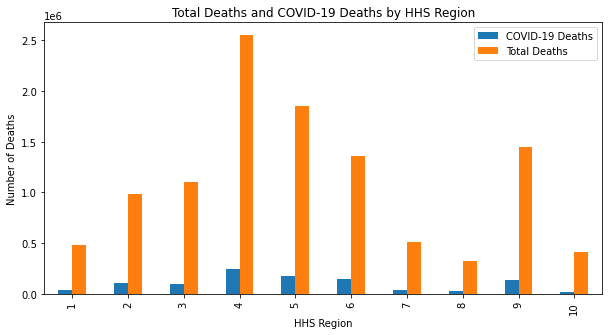

In [11]:


# filter the dataset to get the relevant columns and data
df_h = df1.loc[df1["Group"] == "By Week"] # filter by week
#df1 = df1.loc[df1["Year"] >= 2020] # filter by year
df1_h = df_h[["HHS Region", "COVID-19 Deaths", "Total Deaths"]] # select relevant columns

# group the data by HHS Region and calculate the total deaths and COVID-19 deaths for each region
df1_grouped = df1_h.groupby("HHS Region").sum()

# create a bar chart showing the number of total deaths and COVID-19 deaths for each region
df1_grouped.plot(kind="bar", figsize=(10, 5))
plt.title("Total Deaths and COVID-19 Deaths by HHS Region")
plt.xlabel("HHS Region")
plt.ylabel("Number of Deaths")
plt.show()


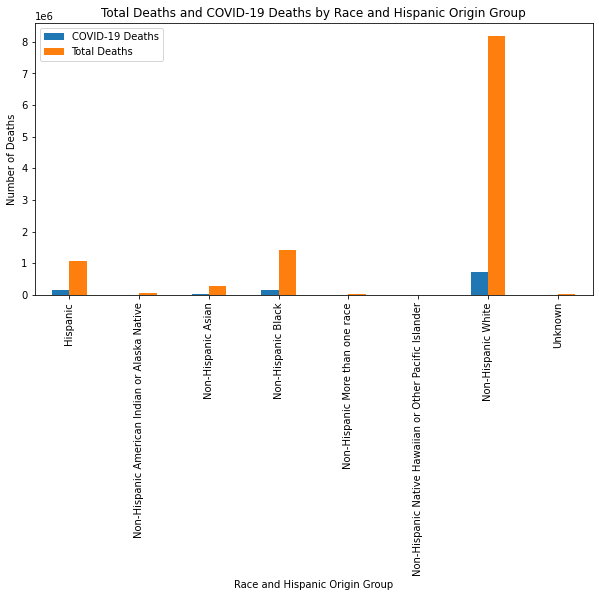

In [12]:
# filter the dataset to get the relevant columns and data
# filter the dataset to get the relevant columns and data
df_h = df1.loc[df1["Group"] == "By Week"] # filter by week
#df1 = df1.loc[df1["Year"] >= 2020] # filter by year
df2_h = df_h[["Race and Hispanic Origin Group", "COVID-19 Deaths", "Total Deaths"]] # select relevant columns
df2_grouped = df2_h.groupby("Race and Hispanic Origin Group").sum()

df2_grouped.plot(kind="bar", figsize=(10, 5))
plt.title("Total Deaths and COVID-19 Deaths by Race and Hispanic Origin Group")
plt.xlabel("Race and Hispanic Origin Group")
plt.ylabel("Number of Deaths")
plt.show()



In [14]:
df1.drop(['_id','Data As Of','Start Date','End Date','Group','Year','MMWR Week','Week-Ending Date','Age Group','Footnote','Month'], axis=1, inplace=True)

In [15]:
df1.head()



,HHS Region,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths
12456,1,Hispanic,0.0,NaN
12457,1,Hispanic,0.0,0.0
12458,1,Hispanic,0.0,NaN
12459,1,Hispanic,0.0,14.0
12460,1,Hispanic,0.0,11.0


In [16]:
df1['HHS Region'] = df1['HHS Region'].astype(str)
df1['Race and Hispanic Origin Group'] = df1['Race and Hispanic Origin Group'].astype(str)

In [17]:
df1 = df1.dropna()

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df1['HHS Region']=encoder.fit_transform(df1['HHS Region'])
df1['Race and Hispanic Origin Group']=encoder.fit_transform(df1['Race and Hispanic Origin Group'])

df1.head()

,HHS Region,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths
12457,0,0,0.0,0.0
12459,0,0,0.0,14.0
12460,0,0,0.0,11.0
12461,0,0,0.0,32.0
12462,0,0,0.0,21.0


In [19]:
df1

,HHS Region,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths
12457,0,0,0.0,0.0
12459,0,0,0.0,14.0
12460,0,0,0.0,11.0
12461,0,0,0.0,32.0
12462,0,0,0.0,21.0
...,...,...,...,...
137010,1,7,0.0,0.0
137011,1,7,0.0,0.0
137013,1,7,0.0,0.0
137014,1,7,0.0,0.0


In [20]:
df1

,HHS Region,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths
12457,0,0,0.0,0.0
12459,0,0,0.0,14.0
12460,0,0,0.0,11.0
12461,0,0,0.0,32.0
12462,0,0,0.0,21.0
...,...,...,...,...
137010,1,7,0.0,0.0
137011,1,7,0.0,0.0
137013,1,7,0.0,0.0
137014,1,7,0.0,0.0


# Spliting dataset

In [21]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns= 'Race and Hispanic Origin Group', axis = 1)
y = df1['Race and Hispanic Origin Group']
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


print("Shapes of X_train and X_test: ",X_train.shape, X_test.shape)
print("Shape of y_train and y_test: ",y_train.shape, y_test.shape)

Shape of X:  (56105, 3)
Shape of y:  (56105,)
Shapes of X_train and X_test:  (44884, 3) (11221, 3)
Shape of y_train and y_test:  (44884,) (11221,)


# LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

X_train_predict = lr.predict(X_train)
y_pred = lr.predict(X_test)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy is : ", training_data_accuracy)

Train accuracy is :  0.38973799126637554


In [23]:
y_pred = lr.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.3955975403261741


# DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dt_clf = dtc.fit(X_train,y_train)
X_train_predict = dtc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy is : ", training_data_accuracy)

Train accuracy is :  0.5539390428660547


In [25]:
y_pred = dtc.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.49300418857499334



 Classification report

              precision    recall  f1-score   support

           0       0.51      0.58      0.54      1348
           1       0.32      0.08      0.13      1165
           2       0.35      0.14      0.20       919
           3       0.56      0.52      0.54      1341
           4       0.26      0.03      0.05       763
           5       0.39      0.74      0.51      2068
           6       0.86      0.76      0.81      2088
           7       0.36      0.44      0.40      1529

    accuracy                           0.49     11221
   macro avg       0.45      0.41      0.40     11221
weighted avg       0.49      0.49      0.46     11221



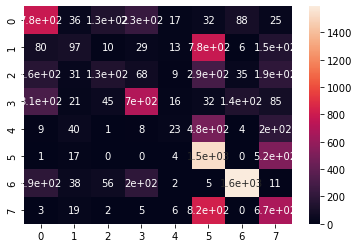

In [26]:
cm1 = confusion_matrix(y,y_pred)
sns.heatmap(cm1, annot=True)
print("\n Classification report\n")
print(classification_report(y,y_pred))

# KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=4,algorithm='ball_tree')
kn_clf = kn.fit(X_train,y_train)
X_train_predict = kn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy is : ", training_data_accuracy)

Train accuracy is :  0.4384190357365654


In [28]:
y_pred = kn.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.40103377595579714



 Classification report

              precision    recall  f1-score   support

           0       0.43      0.56      0.48      1348
           1       0.23      0.45      0.30      1165
           2       0.19      0.23      0.21       919
           3       0.44      0.40      0.42      1341
           4       0.16      0.15      0.15       763
           5       0.42      0.36      0.39      2068
           6       0.78      0.66      0.72      2088
           7       0.41      0.15      0.22      1529

    accuracy                           0.40     11221
   macro avg       0.38      0.37      0.36     11221
weighted avg       0.43      0.40      0.40     11221



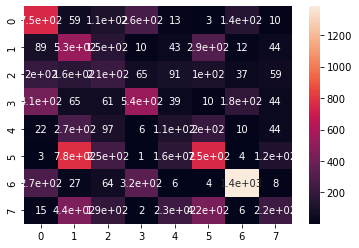

In [29]:
cm2 = confusion_matrix(y,y_pred)
sns.heatmap(cm2, annot=True)
print("\n Classification report\n")
print(classification_report(y,y_pred))


# RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rf_clf = rfc.fit(X_train,y_train)
rf_clf
y_pred = rf_clf.predict(X_test)

In [31]:

X_train_predict = rfc.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy: ", training_data_accuracy)

Train accuracy:  0.5538722039033954


In [32]:
y_pred = rfc.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.49656893325015594


              precision    recall  f1-score   support

           0       0.52      0.59      0.55      1348
           1       0.32      0.09      0.14      1165
           2       0.37      0.14      0.20       919
           3       0.58      0.53      0.55      1341
           4       0.25      0.03      0.05       763
           5       0.39      0.74      0.51      2068
           6       0.85      0.77      0.81      2088
           7       0.36      0.44      0.40      1529

    accuracy                           0.50     11221
   macro avg       0.46      0.42      0.40     11221
weighted avg       0.49      0.50      0.47     11221



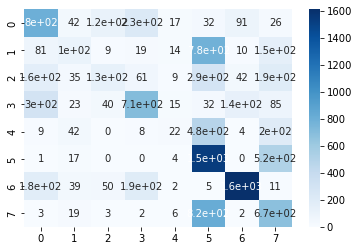

In [33]:
print(classification_report(y_test, y_pred))
cm3 = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm3, annot=True, cmap='Blues')


In [36]:
import psycopg2
con =  psycopg2.connect(host='localhost',
                          user= 'postgres',
                        
                          password= 'mnitgwiy.',
                          database= 'covid_19')

In [37]:
cur = con.cursor()
cur.execute("CREATE TABLE IF NOT EXISTS covid19 (HHS_Region TEXT, Race TEXT, COVID19_Deaths TEXT, Total_Deaths TEXT)")
con.commit()

In [38]:
df1['HHS Region'] = df['HHS Region'].astype(str)
df1['Race and Hispanic Origin Group'] = df1['Race and Hispanic Origin Group'].astype(str)


In [51]:
df1

,HHS Region,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths
12457,1,0,0.0,0.0
12459,1,0,0.0,14.0
12460,1,0,0.0,11.0
12461,1,0,0.0,32.0
12462,1,0,0.0,21.0
...,...,...,...,...
137010,10,7,0.0,0.0
137011,10,7,0.0,0.0
137013,10,7,0.0,0.0
137014,10,7,0.0,0.0
